# 1. Importing Required Libraries

In [2]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 2. Exploring the Data

In [3]:
weather = pd.read_csv("KC_Weather.csv", index_col="DATE")
weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1973-01-01,0.00,0.0,0.0,30.0,17.0
1973-01-02,0.00,0.0,0.0,42.0,16.0
1973-01-03,0.88,5.0,0.0,35.0,16.0
1973-01-04,0.01,0.0,5.0,16.0,3.0
1973-01-05,0.00,0.0,3.0,10.0,4.0
...,...,...,...,...,...
2023-08-18,0.00,0.0,0.0,83.0,59.0
2023-08-19,0.00,0.0,0.0,98.0,69.0
2023-08-20,0.00,0.0,0.0,95.0,76.0


<AxesSubplot:>

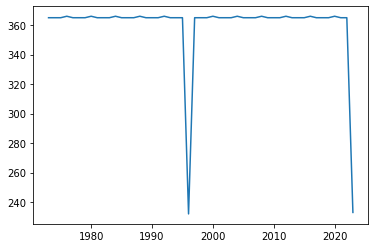

In [8]:
weather.index = pd.to_datetime(weather.index)
Yr=weather.index.year.value_counts().sort_index()
Yr.plot()

In [9]:
weather.describe()

,precip,snow,snow_depth,temp_max,temp_min
count,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000
mean,0.106042,0.051860,0.204913,64.672730,44.572082
std,0.341350,0.409518,0.982392,20.895526,19.576973
min,0.000000,0.000000,0.000000,-8.000000,-23.000000
25%,0.000000,0.000000,0.000000,49.000000,30.000000
50%,0.000000,0.000000,0.000000,67.000000,46.000000
75%,0.020000,0.000000,0.000000,82.000000,62.000000
max,8.820000,10.500000,12.000000,109.000000,83.000000


array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>], dtype=object)

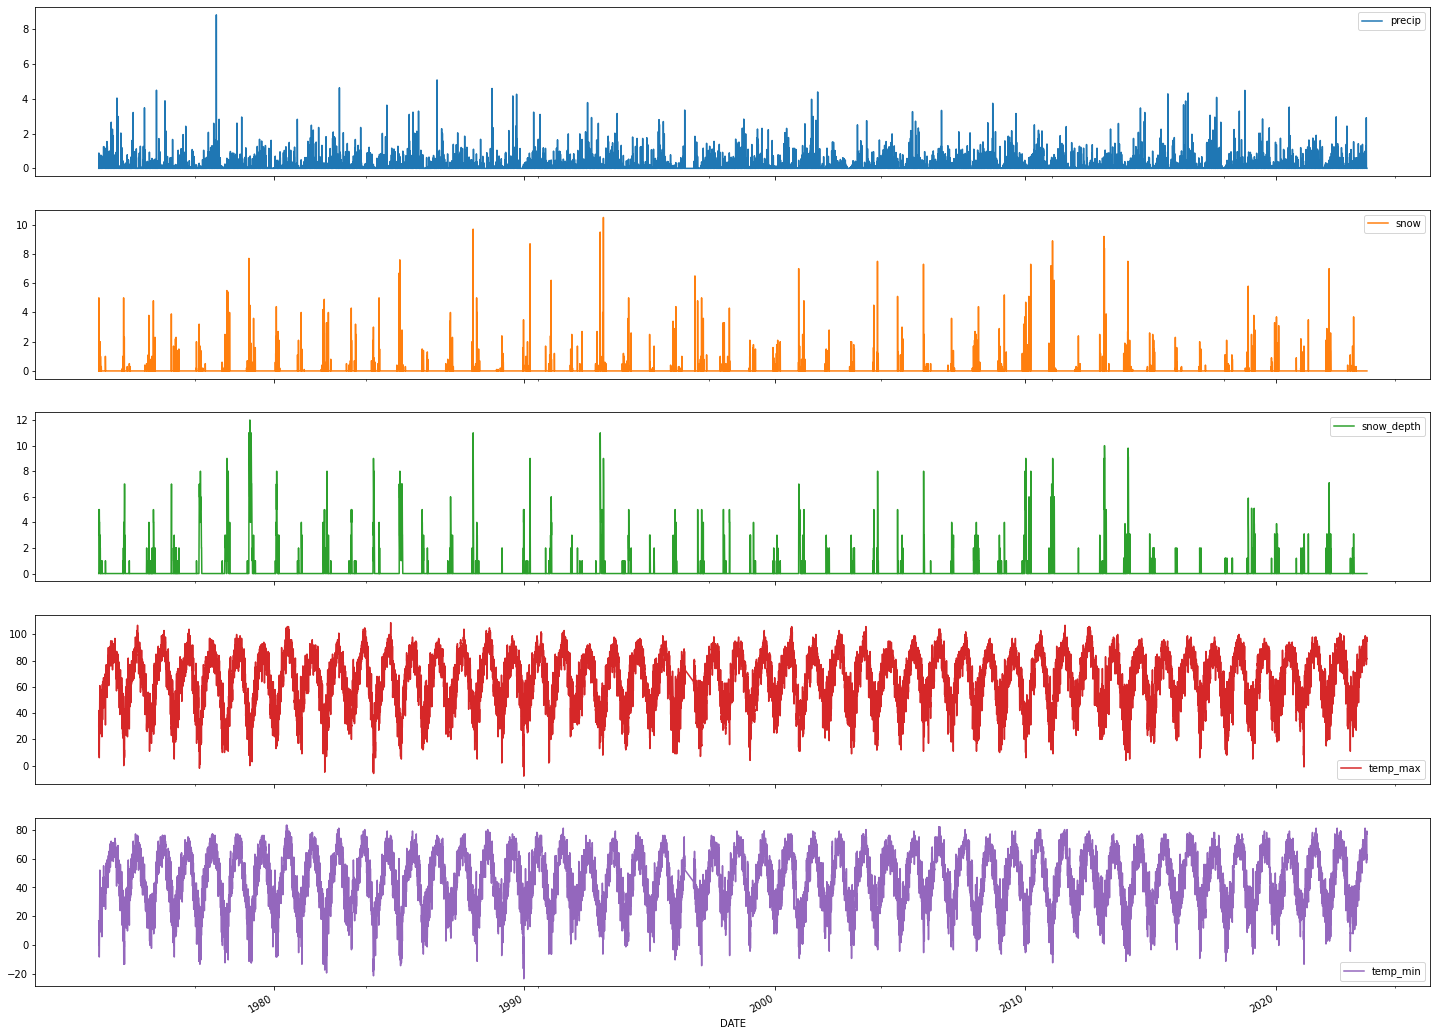

In [10]:
weather.plot(subplots=True, figsize=(25,20))

array([[<AxesSubplot:title={'center':'precip'}>,
        <AxesSubplot:title={'center':'snow'}>],
       [<AxesSubplot:title={'center':'snow_depth'}>,
        <AxesSubplot:title={'center':'temp_max'}>],
       [<AxesSubplot:title={'center':'temp_min'}>, <AxesSubplot:>]],
      dtype=object)

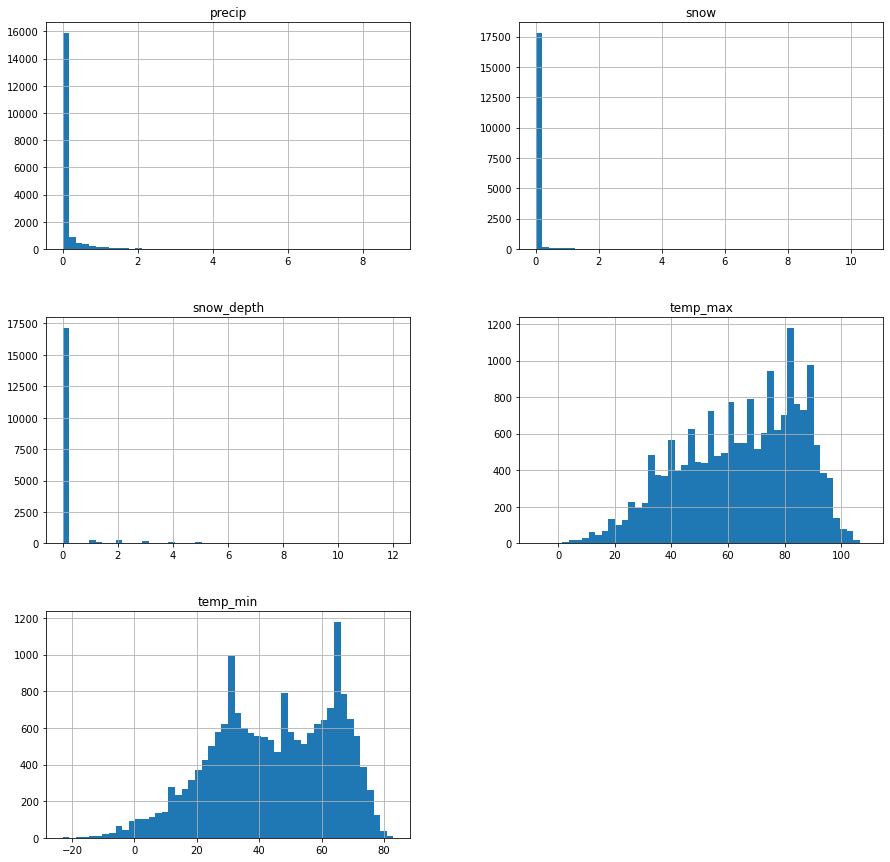

In [11]:
weather.hist(bins=50,figsize=(15,15))

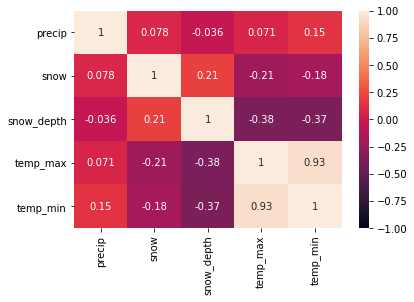

In [12]:
heatmap = sns.heatmap(weather.corr(), vmin=-1, vmax=1, annot=True)

# 3. Random Forest Model

## 3.1 Splitting the data

In [13]:
weather_y=weather.pop("temp_max")
weather_x=weather

In [14]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.25)

In [15]:
print("train_X shape:", train_X.shape)
print("test_X shape:", test_X.shape)
print("train_y shape:", train_y.shape)
print("test_y shape:", test_y.shape)

train_X shape: (13770, 4)
test_X shape: (4591, 4)
train_y shape: (13770,)
test_y shape: (4591,)


## 3.2 Model and Analysis

In [16]:
regr=RandomForestRegressor()
regr.fit(train_X,train_y)

RandomForestRegressor()

In [17]:
prediction=regr.predict(test_X)
np.mean(np.absolute(prediction-test_y))

5.549315351705605

In [18]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.88


In [19]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
DATE,,,
1994-11-05,50.0,49.20,0.80
2008-01-31,34.0,32.50,1.50
2019-08-22,81.0,87.25,-6.25
2010-10-01,76.0,73.89,2.11
2007-05-11,87.0,82.29,4.71
...,...,...,...
1984-08-01,88.0,84.40,3.60
1976-11-21,44.0,46.01,-2.01
1983-12-01,36.0,35.11,0.89


In [20]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 5.55
Residual sum of squares (MSE): 50.36
R2-score: 0.88
